#  Part 1. Analysis of the 2018 NBI dataset

The purpose of this notebook is to analyze the latest FHWA Bridge Inventory dataset for all the bridges in the United States in the 2018 census. This analysis will be developed for steel girder and concrete beam bridges, two of the most common deck typologies not only in USA but mainly in the world. 

We will explore the 2018 data and narrow the scope of this analysis by making some assumptions to focus on the topic we want to develop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

### Import Bridge data

### OJO TAMBIEN HABRÍA QUE SUBIR LOS DATOS DE ELEVATIONS O DE PRECIPITACIONES SI METEMOS ESTADOS CON OTRO CLIMA

We are creating a dataframe from the zip file obtained from FHWA dataset for all the bridges in the US National Bridge Inventory (NBIs) on 2018.

In [3]:
total18 = pd.read_csv('./data/2018hwybronefiledel.zip',compression = 'zip',sep = ',',encoding='latin-1')

/home/dsc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,5,7,17,31,36,37,38,39,71,73,75,96,98,102,107,108,109,123,124,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
total18.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29,TRUCK_ADT,AGE
0,1,00000000000S702,1,6.0,1.0,04007,0.0,9,53.0,0.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9,1999.0,2,0,50.0,2014.0,5,9.7,0,30,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,9.7,14.7,15.0,0.0,0.0,9.7,9.7,99.99,N,0.0,N,0.0,0.0,8,8,7,8,N,2,44.2,2,32.4,7,7,N,5.0,8,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,1,1.0,0,NaN,Y,8,59.0,2037.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50,0.50,20.0
1,1,00000000000S703,1,6.0,1.0,04003,0.0,9,53.0,3004.0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9,2002.0,2,0,159.0,2017.0,5,6.5,0,0,0,1,1,1,1,5.0,0,0.0,0.0,A,1,5,5,1,0.0,0.0,1,0.0,9.7,12.9,13.6,0.3,0.3,9.1,9.8,99.99,N,0.0,N,0.0,0.0,8,8,7,7,N,2,84.2,2,34.8,7,6,N,5.0,7,8.0,NaN,NaN,0.0,117.0,24.0,N,N,N,NaN,NaN,NaN,0.0,0.0,0.0,2017.0,NaN,0.0,NaN,0.0,N,2,NaN,0,1,0.0,2,6,0,8,1.0,0,NaN,Y,8,200.0,2034.0,0.0,Y,6/13/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28,1.59,17.0
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,0,113.0,27568.0,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9,1942.0,2,0,375.0,2017.0,4,10.4,0,0,0,0,0,1,1,5.0,0,0.0,0.0,A,1,5,1,4,0.0,0.0,3,0.0,7.2,18.3,43.0,0.6,0.6,7.2,9.0,99.99,N,0.0,N,0.0,0.0,5,5,6,6,N,2,51.7,2,37.2,5,4,N,5.0,8,6.0,38.0,1.0,52.8,1017.0,24.0,N,Y60,N,NaN,1017.0,NaN,1.0,1.0,2

In [4]:
total18.shape

(616096, 137)

There are 616096 bridges in the NBIs dataset and 137 columns with variables.

In [7]:
list(total18.columns)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

### Clear and Merge Data

We will perform several filters in order to clear our data and get some useful insights. 
The filters will be developed from generic to more specific features.

We will also need to add columns and transform some variables.

Our filters and merge operations will be: 

    

    1) Selecting only bridges: the FHWA inventory includes data on both bridges and culverts.

    2) Limit the dataset to bridges built after 1900: bridges built before ASTM standards (founded in 1898) would have had inconsistent standards for material acceptance in the bridge.
    
    3) Limit bridge length to 600ft: typical girder/beam bridges have 3 or 4 spans (remember the overpasses you see when driving on a highway) than are 40 meters long, that means 4*40 = 160 m = 525ft   
    
    4) Delete impossible data like year of reconstruction after current year.
    
    5) Selecting only the columns we will be interested in.

    6) Filtering only the bridges with steel girders and prestressed concrete decks.
    
    7) Group categories in some of the categorical variables

    


In [5]:
#The culverts will be dropped out of our dataset

total18 = total18.loc[total18['CULVERT_COND_062'] == 'N']

In [6]:
total18.shape

(475464, 137)

In [6]:
#Drop bridges built before 1900 due to material standards

total18 = total18.loc[total18['YEAR_BUILT_027'] > 1900]

In [8]:
total18.shape

(470511, 137)

In [7]:
# Drop bridges that are more than 600ft long.

total18 = total18.loc[total18['STRUCTURE_LEN_MT_049'] < 600]

In [10]:
total18.shape

(467329, 137)

In [8]:
# Drop impossible data like year of reconstruction after year of last inspection (2018) 

total18['YEAR_RECONSTRUCTED_106'].fillna(0, inplace = True)
total18 = total18[total18['YEAR_RECONSTRUCTED_106'] < 2018]

In [12]:
# Also drop bridges with year of reconstruction before year built.

total18[(total18['YEAR_RECONSTRUCTED_106']!=0) & (total18['YEAR_RECONSTRUCTED_106']<= total18['YEAR_BUILT_027'])]

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,HISTORY_037,NAVIGATION_038,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,OPEN_CLOSED_POSTED_041,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_REF_054A,VERT_CLR_UND_054B,LAT_UND_REF_055A,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,UNDCLRENCE_EVAL_069,POSTING_EVAL_070,WATERWAY_EVAL_071,APPR_ROAD_EVAL_072,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_092A,UNDWATER_LOOK_SEE_092B,SPEC_INSPECT_092C,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_CODE_098A,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
135032,17,90801000001001,1,6.0,1.0,126,0.0,9,151.0,0.0,'GRAND PIERRE CREEK TRIB ',NaN,'TR 45 ','NW1/4 S8T12SR7E ',99.99,3.200,0.0,0000000000,0.0,37295961.0,88275732.0,9,3,64,64,9,1989.0,2,0,29.0,1993.0,4,4.3,0,45,0,0,0,0,0,4.0,0,0.0,0.0,A,1,5,5,5,0.0,0.0,1,0.0,7.3,8.4,8.9,0.0,0.0,7.3,7.3,99.99,N,0.0,N,0.0,92.6,7,7,7,7,N,1,60.8,1,34.5,7,6,N,5.0,8,6.0,35.0,NaN,0.0,417.0,24.0,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,2,NaN,0,0,7.0,2,0,0,0,NaN,0,NaN,Y,4,43.0,2038.0,0.0,Y,5/16/2018,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,97.0,0,G,7,64.97
135033,17,90801000001005,1,6.0,1.0,141,0.0,9,69.0,0.0,'BIG CREEK ',NaN,'FAS 2934-FH 141 ','3.5 M N E'TOWN ',99.99,6.080,0.0,0000000000,0.0,37295324.0,88193969.0,0,3,64,64,9,1968.0,2,0,100.0,1993.0,0,7.3,0,0,0,0,0,0,0,4.0,0,0.0,0.0,P,1,5,3,2,0.0,0.0,1,0.0,8.4,24.1,24.5,0.3,0.3,7.3,7.9,99.99,N,0.0,N,0.0,92.6,4,5,6,3,N,1,90.8,1,60.8,5,6,N,5.0,8,6.0,35.0,NaN,0.0,417.0,24.0,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,2,NaN,0,0,1.0,8,6,0,0,0.0,0,NaN,Y,4,150.0,2038.0,0.0,Y,5/16/2018,B,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,83.0,1,P,4,193.55
135034,17,90802000003001,1,6.0,0.0,656,0.0,9,3.0,580.0,'WOLF CREEK ',NaN,'NO DATA ENTERED ','T15SR2WS18 ',99.99,0.001,0.0,0000000000,0.0,37130209.0,89203461.0,999,3,64,64,9,2003.0,1,0,1.0,2003.0,9,3.7,0,0,0,0,0,0,0,4.0,0,0.0,0.0,A,1,5,7,3,0.0,0.0,1,0.0,3.4,8.8,9.4,0.0,0.0,3.7,4.3,99.99,N,0.0,N,0.0,0.0,7,8,8,6,N,1,87.2,1,51.8,8,4,N,5.0,8,8.0,NaN,NaN,0.0,417.0,24.0,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,3,NaN,0,0,2.0,8,7,0,0,NaN,0,1.0,Y,4,1.0,2038.0,0.0,

In [9]:
total18.drop(total18[(total18['YEAR_RECONSTRUCTED_106']!=0) & (total18['YEAR_RECONSTRUCTED_106']<= total18['YEAR_BUILT_027'])].index, inplace = True)

In [14]:
total18.shape

(467243, 137)

In [10]:
# Add some features that are more easy to read

# Average daily traffic for trucks
total18['TRUCK_ADT'] = total18['ADT_029']*total18['PERCENT_ADT_TRUCK_109']/100

In [17]:
# Age of bridge:
# Will be calculated as 2019 (current year) - the year the bridge was built, unless the bridge has been reconstructed
# If the bridge has been reconstructed, Age will be 2019 - year of reconstruction

(total18['YEAR_RECONSTRUCTED_106']==0).value_counts()

True     395971
False     71272
Name: YEAR_RECONSTRUCTED_106, dtype: int64

In [12]:
# Age of bridge
total18['AGE'] = total18.apply(lambda row : (2019-row['YEAR_RECONSTRUCTED_106']) if row['YEAR_RECONSTRUCTED_106']>0 
                               else (2019 - row['YEAR_BUILT_027']), axis =1)

In [14]:
# Let's select only the columns we will work with

descriptive_cols = ['STATE_CODE_001',
                    'STRUCTURE_NUMBER_008',
                    'LAT_016',
                    'LONG_017']

geometric_cols = ['TRAFFIC_LANES_ON_028A',
                  'MEDIAN_CODE_033',
                  'DEGREES_SKEW_034',
                  'STRUCTURE_KIND_043A',
                  'STRUCTURE_TYPE_043B',
                  'MAIN_UNIT_SPANS_045',
                  'MAX_SPAN_LEN_MT_048',
                  'STRUCTURE_LEN_MT_049',
                  'DECK_WIDTH_MT_052',
                  'SURFACE_TYPE_108A']

functional_cols = ['YEAR_BUILT_027',
                   'YEAR_RECONSTRUCTED_106',
                   'AGE',
                   'DESIGN_LOAD_031',
                   'TRUCK_ADT']

operational_cols = ['MAINTENANCE_021',
                    'FUNCTIONAL_CLASS_026',
                    'WATERWAY_EVAL_071']

rating_cols = ['DECK_COND_058',
               'SUPERSTRUCTURE_COND_059',
               'SUBSTRUCTURE_COND_060']

In [15]:
cols_interest = descriptive_cols+geometric_cols+functional_cols+operational_cols+rating_cols
cols_interest

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'LAT_016',
 'LONG_017',
 'TRAFFIC_LANES_ON_028A',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAIN_UNIT_SPANS_045',
 'MAX_SPAN_LEN_MT_048',
 'STRUCTURE_LEN_MT_049',
 'DECK_WIDTH_MT_052',
 'SURFACE_TYPE_108A',
 'YEAR_BUILT_027',
 'YEAR_RECONSTRUCTED_106',
 'AGE',
 'DESIGN_LOAD_031',
 'TRUCK_ADT',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

In [43]:
# Let's reduce the dataset to those columns
total18_fil = total18[cols_interest]

In [44]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,1,00000000000S702,31061110.0,87341340.0,2,0,30,5,5,1,14.7,15.0,9.7,6,1999.0,0.0,20.0,5,0.50,62,9,8,8,8,7
1,1,00000000000S703,31062020.0,87340890.0,2,0,0,5,1,1,12.9,13.6,9.8,6,2002.0,0.0,17.0,5,1.59,62,9,7,8,8,7
2,1,0000000000M0022,32174328.0,84583800.0,2,0,0,1,4,3,18.3,43.0,9.0,1,1942.0,0.0,77.0,4,131.25,74,9,8,5,5,6
3,1,000000883039900,34270600.0,87581200.0,2,0,99,5,5,5,14.0,65.5,10.5,0,1974.0,0.0,45.0,5,15.00,67,8,9,7,7,7
8,1,000004504800350,34281800.0,86223000.0,2,0,0,1,4,1,18.3,19.2,8.2,6,1939.0,0.0,80.0,4,17.50,67,9,6,7,7,7


In [18]:
total18_fil.shape

(467243, 25)

In [21]:
total18_fil.dtypes

STATE_CODE_001               int64
STRUCTURE_NUMBER_008        object
LAT_016                    float64
LONG_017                   float64
TRAFFIC_LANES_ON_028A        int64
MEDIAN_CODE_033              int64
DEGREES_SKEW_034             int64
STRUCTURE_KIND_043A          int64
STRUCTURE_TYPE_043B          int64
MAIN_UNIT_SPANS_045          int64
MAX_SPAN_LEN_MT_048        float64
STRUCTURE_LEN_MT_049       float64
DECK_WIDTH_MT_052          float64
SURFACE_TYPE_108A           object
YEAR_BUILT_027             float64
AGE                        float64
DESIGN_LOAD_031             object
TRUCK_ADT                  float64
MAINTENANCE_021              int64
FUNCTIONAL_CLASS_026         int64
WATERWAY_EVAL_071           object
YEAR_RECONSTRUCTED_106     float64
DECK_COND_058               object
SUPERSTRUCTURE_COND_059     object
SUBSTRUCTURE_COND_060       object
dtype: object

In [19]:
object_cols = ['SURFACE_TYPE_108A','DESIGN_LOAD_031','WATERWAY_EVAL_071','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']

In [45]:
# Convert the columns with no type to numeric values
for col in object_cols:
    total18_fil[col] = pd.to_numeric(total18_fil[col], errors='coerce')
    total18_fil[col] = total18_fil[col].astype('float64')
    

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## VER SI SE PUEDE QUITAR ESTE WARNING CON EL .LOC
## VER EL FILTER DE LAS CULVERTS QUE SI LO TIENE

In [27]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,PERCENT_ADT_TRUCK_109,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
0,1,00000000000S702,31061110.0,87341340.0,2,0,30,5,5,1,14.7,15.0,9.7,6.0,1999.0,50.0,5.0,1.0,62,9,8.0,0.0,8.0,8.0,7.0
1,1,00000000000S703,31062020.0,87340890.0,2,0,0,5,1,1,12.9,13.6,9.8,6.0,2002.0,159.0,5.0,1.0,62,9,7.0,0.0,8.0,8.0,7.0
2,1,0000000000M0022,32174328.0,84583800.0,2,0,0,1,4,3,18.3,43.0,9.0,1.0,1942.0,375.0,4.0,35.0,74,9,8.0,0.0,5.0,5.0,6.0
3,1,000000883039900,34270600.0,87581200.0,2,0,99,5,5,5,14.0,65.5,10.5,0.0,1974.0,300.0,5.0,5.0,67,8,9.0,0.0,7.0,7.0,7.0
4,1,000001014002450,34481800.0,87225400.0,2,0,0,3,10,2,53.3,1981.2,7.8,0.0,1937.0,6200.0,4.0,10.0,67,6,8.0,1962.0,5.0,6.0,5.0


In [29]:
# We only want the bridges with steel girders and prestressed concrete beams

total18_fil['STRUCTURE_KIND_043A'].unique()

array([5, 1, 3, 4, 2, 6, 7, 8, 0, 9])

In [29]:
# We only want beams or girders superstructures
total18_fil['STRUCTURE_TYPE_043B'].unique()

array([ 5,  1,  4, 10,  3, 22,  2, 12, 11,  7,  9,  0,  6, 21, 15, 14,  8,
       13, 17, 16, 20])

In [46]:
# The item codification is as follows: 
# 3 for steel, 4 for steel continuous, 5 for pre-stressed concrete and 6 for pre-stressed concrete continuous

total18_fil = total18_fil[(total18_fil['STRUCTURE_KIND_043A'].isin([3,4,5,6]))]

In [22]:
total18_fil.shape

(315916, 25)

In [47]:
# The item codification is 2 for stringer/multi-beam or girder

total18_fil = total18_fil[(total18_fil['STRUCTURE_TYPE_043B']==2)]
total18_fil.drop(['STRUCTURE_TYPE_043B'], axis=1, inplace = True)

In [33]:
total18_fil.shape

(217452, 25)

In [106]:
# Grouping categories in some variables

In [48]:
# Median on bridge - ITEM 33
code_median = {0:0,1:1,2:2,3:2}
total18_fil['MEDIAN_CODE_033'] = total18_fil['MEDIAN_CODE_033'].map(code_median)

In [49]:
# Structure Type - ITEM 43A
code_struc = {3:'steel',4:'steel',5:'concrete',6:'concrete'}
total18_fil['STRUCTURE_KIND_043A'] = total18_fil['STRUCTURE_KIND_043A'].map(code_struc)

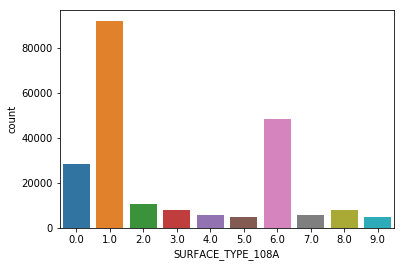

In [26]:
# Wearing surface - ITEM 108
sns.countplot(total18_fil['SURFACE_TYPE_108A'])

In [50]:
code_ws = {1:'concrete',2:'concrete',3:'concrete',4:'concrete',
          6:'bituminous', 0:'none'}

total18_fil['SURFACE_TYPE_108A'] = total18_fil['SURFACE_TYPE_108A'].map(code_ws)

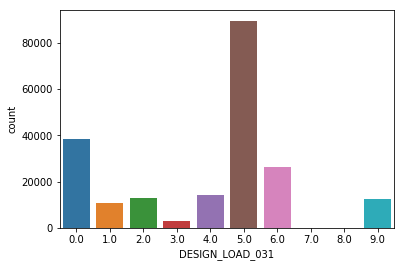

In [73]:
# Design Load - ITEM 31
sns.countplot(total18_fil['DESIGN_LOAD_031'])

In [51]:
code_truck = {0:'other',7:'other',8:'other',
              1:'light',2:'light',3:'light',4:'light',
              5:'heavy',6:'heavy',9:'heavy'}

total18_fil['DESIGN_LOAD_031'] = total18_fil['DESIGN_LOAD_031'].map(code_truck)

In [52]:
# Maintenanace Responsability - ITEM 21
code_resp = {1:1,2:2,3:3,4:4}
total18_fil['MAINTENANCE_021'] = total18_fil['MAINTENANCE_021'].map(code_resp)
total18_fil['MAINTENANCE_021'].fillna(5, inplace = True)

In [53]:
# Functional Classification - ITEM 26
code_class = {1:'rural',2:'rural',6:'rural',7:'rural',8:'rural',9:'rural',
              11:'urban',12:'urban',14:'urban',16:'urban',17:'urban',19:'urban'}
total18_fil['FUNCTIONAL_CLASS_026'] = total18_fil['FUNCTIONAL_CLASS_026'].map(code_class)

In [54]:
# Waterway - ITEM 71
code_water = {9:'low',8:'low',
              7:'high',6:'high',5:'high',4:'high',3:'high',2:'high',
              np.nan:'none'}

total18_fil['WATERWAY_EVAL_071'] = total18_fil['WATERWAY_EVAL_071'].map(code_water)

In [32]:
# Finally the dataset we have obtained is as follows
total18_fil.shape

(217452, 24)

In [42]:
total18_fil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217452 entries, 17 to 616084
Data columns (total 25 columns):
STATE_CODE_001             217452 non-null int64
STRUCTURE_NUMBER_008       217452 non-null object
LAT_016                    217450 non-null float64
LONG_017                   217450 non-null float64
TRAFFIC_LANES_ON_028A      217452 non-null int64
MEDIAN_CODE_033            217452 non-null int64
DEGREES_SKEW_034           217452 non-null int64
STRUCTURE_KIND_043A        217452 non-null object
STRUCTURE_TYPE_043B        217452 non-null int64
MAIN_UNIT_SPANS_045        217452 non-null int64
MAX_SPAN_LEN_MT_048        217452 non-null float64
STRUCTURE_LEN_MT_049       217452 non-null float64
DECK_WIDTH_MT_052          217452 non-null float64
SURFACE_TYPE_108A          193211 non-null object
YEAR_BUILT_027             217452 non-null float64
AGE                        217452 non-null float64
DESIGN_LOAD_031            205424 non-null object
TRUCK_ADT                  205287 non

In [59]:
# Drop null values
total18_fil.dropna(inplace = True)

In [60]:
total18_fil.shape

(173988, 24)

In [56]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,LAT_016,LONG_017,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
17,1,000013771700120,34465400.0,87390000.0,2,0,0,steel,1,17.7,18.9,9.8,bituminous,1958.0,0.0,61.0,heavy,253.4,5.0,urban,none,6.0,7.0,7.0
20,1,000022,34210179.0,85552206.0,1,0,0,steel,1,8.5,8.5,3.7,NaN,1902.0,0.0,117.0,other,0.0,2.0,rural,high,6.0,6.0,5.0
22,1,000029,34141589.0,86055054.0,1,0,0,steel,1,11.0,11.0,3.7,NaN,1908.0,0.0,111.0,light,0.0,2.0,rural,high,9.0,5.0,5.0
23,1,000037,32503334.0,86085719.0,1,0,0,steel,2,5.6,11.3,4.3,NaN,1910.0,0.0,109.0,other,0.0,2.0,rural,high,6.0,6.0,6.0
25,1,000040,33304800.0,86480500.0,4,2,0,steel,1,8.2,8.2,44.5,bituminous,1910.0,0.0,109.0,other,130.0,4.0,urban,none,4.0,4.0,4.0


# VER PORQUE NO PASA BIEN LA FUNCION

In [61]:
# Convert the latitude and longitude dimensions to decimal degrees 

def conv_decdeg(num):
    a = pd.to_numeric(str(num)[:-6])
    b = pd.to_numeric((str(num)[-6:-4]))/60
    c = pd.to_numeric(str(num)[-4:])/(100*3600)
    val = (a+b+c)/100
    return val

def get_new_l(df,func):
    
    # Transform values to integers
    df['LONG_017'] = pd.to_numeric(df['LONG_017'],downcast = 'signed')
    df['LAT_016'] = pd.to_numeric(df['LAT_016'],downcast = 'signed')

    # Apply function to get values in decimal degrees
    df['LONGITUDE'] = -df['LONG_017'].apply(func)
    df['LATITUDE'] = df['LAT_016'].apply(func)

    # Drop coordinates outside the USA
    df = df[df['LONGITUDE'].between(-175,-64)]
    df = df[df['LATITUDE'].between(16,56)]
    
    # Drop former longitude and latitude columns
    df.drop(['LAT_016', 'LONG_017'], axis=1, inplace = True)
    
 
get_new_l(total18_fil,conv_decdeg)

In [64]:
total18_fil = total18_fil[total18_fil['LONGITUDE'].between(-175,-64)]

In [66]:
total18_fil = total18_fil[total18_fil['LATITUDE'].between(16,56)]

In [67]:
total18_fil.drop(['LAT_016', 'LONG_017'], axis=1, inplace = True)

In [68]:
total18_fil.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,YEAR_RECONSTRUCTED_106,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,LONGITUDE,LATITUDE
17,1,000013771700120,2,0,0,steel,1,17.7,18.9,9.8,bituminous,1958.0,0.0,61.0,heavy,253.4,5.0,urban,none,6.0,7.0,7.0,-87.390000,34.469000
25,1,000040,4,2,0,steel,1,8.2,8.2,44.5,bituminous,1910.0,0.0,109.0,other,130.0,4.0,urban,none,4.0,4.0,4.0,-86.480833,33.308000
31,1,000050,2,0,20,steel,1,9.4,9.4,6.7,concrete,1910.0,1995.0,24.0,light,2.0,2.0,rural,high,6.0,6.0,5.0,-86.372668,34.578835
33,1,000060,3,0,0,concrete,3,10.4,34.7,15.2,concrete,1994.0,0.0,25.0,heavy,7.6,4.0,urban,none,7.0,7.0,7.0,-86.508000,34.103000
45,1,000083,1,0,20,steel,2,3.7,7.3,4.0,concrete,1914.0,0.0,105.0,heavy,0.0,2.0,rural,high,8.0,7.0,5.0,-86.245834,34.533002


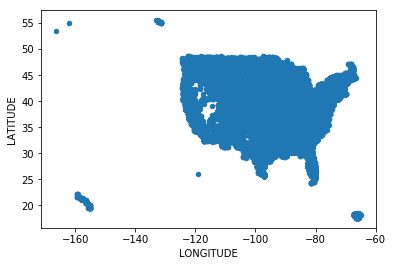

In [69]:
total18_fil.plot(kind='scatter', x='LONGITUDE', y='LATITUDE')
plt.show()

The scatter plot of longitude and latitude looks like a United States map, including the islands like Hawaii and Puerto Rico, and also several points in Alaska.

In [40]:
categorical_cols = [ 'MEDIAN_CODE_033',
 'STRUCTURE_KIND_043A',
 'SURFACE_TYPE_108A',
 'DESIGN_LOAD_031',
 'MAINTENANCE_021',
 'FUNCTIONAL_CLASS_026',
 'WATERWAY_EVAL_071',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060']

for col in categorical_cols:
    values = total18_fil[col].unique()
    print("The values of %s column are: %s" %(col, values))

The values of MEDIAN_CODE_033 column are: [0 2 1]
The values of STRUCTURE_KIND_043A column are: ['steel' 'concrete']
The values of SURFACE_TYPE_108A column are: ['bituminous' 'concrete' 'none']
The values of DESIGN_LOAD_031 column are: ['heavy' 'other' 'light']
The values of MAINTENANCE_021 column are: [5. 4. 2. 1. 3.]
The values of FUNCTIONAL_CLASS_026 column are: ['urban' 'rural']
The values of WATERWAY_EVAL_071 column are: ['none' 'high' 'low']
The values of DECK_COND_058 column are: [6. 4. 7. 8. 5. 3. 9. 2. 0. 1.]
The values of SUPERSTRUCTURE_COND_059 column are: [7. 4. 6. 5. 3. 2. 8. 9. 0. 1.]
The values of SUBSTRUCTURE_COND_060 column are: [7. 4. 5. 6. 2. 3. 8. 9. 1. 0.]


In [48]:
# Since we are looking for joining all the datasets with this one by using the Structure number, we should first check that there are no duplicates on it
total18_fil['STRUCTURE_NUMBER_008'].duplicated().value_counts()

False    166517
True       7471
Name: STRUCTURE_NUMBER_008, dtype: int64

In [49]:
dupl_rows = total18_fil[total18_fil.duplicated(['STRUCTURE_NUMBER_008'])]
dupl_rows.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,TRAFFIC_LANES_ON_028A,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,DECK_WIDTH_MT_052,SURFACE_TYPE_108A,YEAR_BUILT_027,AGE,DESIGN_LOAD_031,TRUCK_ADT,MAINTENANCE_021,FUNCTIONAL_CLASS_026,WATERWAY_EVAL_071,YEAR_RECONSTRUCTED_106,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,longitude,latitude
22989,4,7596,6,0,10,concrete,2,1,19.5,20.7,26.3,concrete,1988.0,31.0,heavy,412.0,4.0,urban,low,0.0,7.0,7.0,7.0,11205.966864,3334.300247
22992,4,7599,6,0,21,concrete,2,1,27.1,27.7,25.5,concrete,1978.0,41.0,heavy,1507.6,4.0,urban,low,0.0,6.0,7.0,7.0,11158.633522,3339.366767
23011,4,7630,3,0,4,concrete,2,3,31.7,96.0,17.7,concrete,1989.0,30.0,heavy,2350.0,4.0,urban,high,1996.0,7.0,7.0,7.0,11059.583456,3208.033361
23289,4,7960,2,0,0,concrete,2,16,27.4,411.2,19.1,concrete,1991.0,28.0,heavy,932.9,4.0,urban,none,0.0,7.0,7.0,7.0,11200.000164,3326.100144
23301,4,7976,1,0,0,concrete,2,8,27.4,192.0,5.5,concrete,1991.0,28.0,heavy,796.7,4.0,urban,none,0.0,7.0,7.0,7.0,11200.133458,3326.100125


In [41]:
state_name = {25:'MASSACHUSETTS',
             4:'ARIZONA', 
             8:'COLORADO',
             38:'NORTH DAKOTA', 
             9:'CONNECTICUT', 
             19:'IOWA', 
             26:'MICHIGAN', 
             48:'TEXAS',
             35:'NEW MEXICO',
             17:'ILLINOIS', 
             51:'VIRGINIA',
             23:'MAINE',
             16:'IDAHO',
             36:'NEW YORK',
             56:'WYOMING',
             29:'MISSOURI',
             39:'OHIO',
             28:'MISSISSIPI', 
             11:'DISTRICT OF COLOMBIA',
             21:'KENTUCKY', 
             18:'INDIANA',
             6:'CALIFORNIA',
             47:'TENNESSEE', 
             12:'FLORIDA',
             24:'MARYLAND',
             34:'NEW JERSEY', 
             46:'SOUTH DAKOTA',
             13:'GEORGIA',
             55:'WISCONSIN',
             30:'MONTANA',
             54:'WEST VIGINIA',
             15:'HAWAII', 
             32:'NEVADA', 
             37:'NORTH CAROLINA',
             10:'DELAWARE', 
             33:'NEW HAMPSHIRE', 
             44:'RHODE ISLAND',
             50:'VERMONT', 
             42:'PENNSYLVANIA', 
             5:'ARKANSAS', 
             20:'KANSAS', 
             45:'SOUTH CAROLINA',
             22:'LOUISIANA',
             40:'OKLAHOMA', 
             72:'PUERTO RICO', 
             41:'OREGON',
             21:'MINNESOTA', 
             53:'WASHINGTON', 
             1:'ALABAMA', 
             31:'NEBRASKA',
             2:'ALASKA', 
             49:'UTAH'
               }

In [43]:
dupl_rows['STATE_NAME'] =  dupl_rows['STATE_CODE_001'].map(state_name)
dupl_rows['STATE_NAME'].value_counts()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


VIRGINIA          2127
PENNSYLVANIA      1742
SOUTH CAROLINA    1275
MISSOURI           772
IOWA               419
MICHIGAN           408
NORTH CAROLINA     251
RHODE ISLAND       152
INDIANA            125
NEW MEXICO         120
ARKANSAS            57
MAINE               26
ARIZONA             22
IDAHO               14
OHIO                12
NEW YORK            10
KANSAS               6
OKLAHOMA             4
NEW JERSEY           3
PUERTO RICO          3
SOUTH DAKOTA         2
TEXAS                1
Name: STATE_NAME, dtype: int64

In [50]:
(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008']

STATE_CODE_001
4      1.794454
5      1.620839
16     1.516793
18     2.482842
19     5.848284
20     0.215827
23     2.623295
26    11.385999
27     1.178101
29     6.862128
34     0.092851
35    11.881188
36     0.116944
37     2.938272
39     0.148448
40     0.047636
42    30.687456
44    39.175258
45    47.737730
46     0.280112
48     0.005899
51    38.571429
72     0.267142
Name: STRUCTURE_NUMBER_008, dtype: float64

In [51]:
# Before dropping all the duplicated values, let's calculate the percentage of data lost

(100*dupl_rows.groupby('STATE_CODE_001').count()/total18_fil.groupby('STATE_CODE_001').count()).dropna()['STRUCTURE_NUMBER_008'].describe()

count    23.000000
mean      9.020823
std      14.701560
min       0.005899
25%       0.241484
50%       1.794454
75%       9.124064
max      47.737730
Name: STRUCTURE_NUMBER_008, dtype: float64

In South Carolina almost half of the bridges were duplicated (48%). We are also loosing a big part of the data in Pennsylvania and Rhode Island.

However, the median of loss is less than 2% of the bridges, so will drop the duplicated values.

In [70]:
# Drop duplicates

total18_fil.drop_duplicates(subset='STRUCTURE_NUMBER_008', inplace = True)

In [71]:
total18_fil.shape

(166209, 24)

In [72]:
# Save to csv

total18_fil.to_csv (r'./total18_fil.csv', index = None, header=True)